# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [1]:
from utils import get_dataset
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import tensorflow as tf
import os 

%matplotlib inline

In [2]:
np.random.seed(0)
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
train_data = get_dataset("/home/workspace/data/train/*.tfrecord")
test_data = get_dataset("/home/workspace/data/test/*.tfrecord")
val_data = get_dataset("/home/workspace/data/val/*.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/train/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 86
Instructions for updating:
Use `tf.data.Dataset.interleave(map_func, cycle_length, block_length, num_parallel_calls=tf.data.experimental.AUTOTUNE)` instead. If sloppy execution is desired, use `tf.data.Options.experimental_deterministic`.
Instructions for updating:
Use `tf.data.Dataset.map()
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/test/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 3
INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data/val/*.tfrecord']
INFO:tensorflow:Number of filenames to read: 10


In [4]:
train_data

<DatasetV1Adapter shapes: {image: (None, None, 3), source_id: (), key: (), filename: (), groundtruth_image_confidences: (None,), groundtruth_verified_neg_classes: (None,), groundtruth_not_exhaustive_classes: (None,), groundtruth_boxes: (None, 4), groundtruth_area: (None,), groundtruth_is_crowd: (None,), groundtruth_difficult: (None,), groundtruth_group_of: (None,), groundtruth_weights: (None,), groundtruth_classes: (None,), groundtruth_image_classes: (None,), original_image_spatial_shape: (2,)}, types: {image: tf.uint8, source_id: tf.string, key: tf.string, filename: tf.string, groundtruth_image_confidences: tf.float32, groundtruth_verified_neg_classes: tf.int64, groundtruth_not_exhaustive_classes: tf.int64, groundtruth_boxes: tf.float32, groundtruth_area: tf.float32, groundtruth_is_crowd: tf.bool, groundtruth_difficult: tf.int64, groundtruth_group_of: tf.bool, groundtruth_weights: tf.float32, groundtruth_classes: tf.int64, groundtruth_image_classes: tf.int64, original_image_spatial_sh

## Write a function to display an image and the bounding boxes

Implement the `display_images` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [5]:
def display_images(batch):
    
    color_map = {1: [1, 0, 0], 2: [0, 0, 1], 4: [0, 1, 0]}
     
    image_shape = batch["image"].numpy().shape
    image_classes = batch["groundtruth_classes"].numpy()
    image_boxes = batch["groundtruth_boxes"].numpy()
    
    figure, ax = plt.subplots()
    
    for img_box, img_class in zip(image_boxes, image_classes):
        y1, x1, y2, x2 = img_box
 
        width = (x2 - x1) * image_shape[1]
        height = (y2 - y1) * image_shape[0] 

        rectangle = patches.Rectangle((x1*image_shape[1], y1*image_shape[0]), width, height,
                             facecolor = "none", edgecolor = color_map[img_class])
        ax.add_patch(rectangle)

    plt.axis("off")
    plt.imshow(batch["image"].numpy())
    

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

In [6]:
current_dir = os.getcwd()

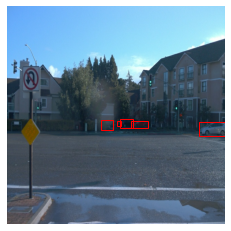

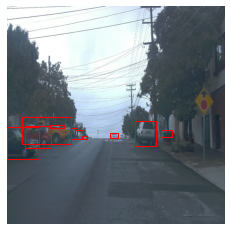

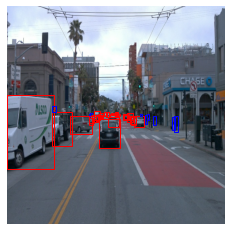

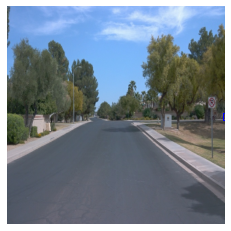

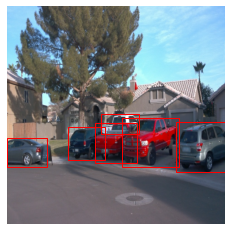

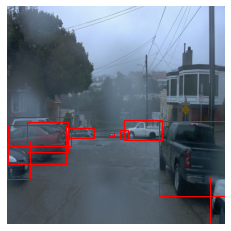

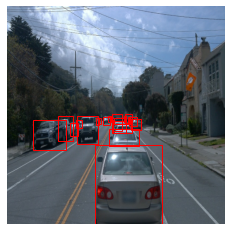

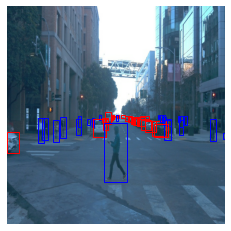

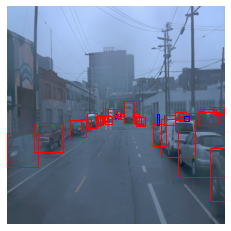

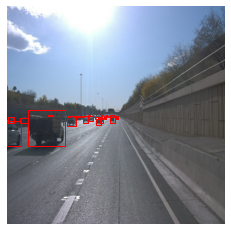

In [7]:
train_data.shuffle(50)
for image_num, batch in enumerate(train_data.take(10)):
    display_images(batch)
    try:
        os.makedirs(f"{current_dir}/examples/training")
    except OSError as error:
        pass    
    plt.savefig(f"{current_dir}/examples/training/random_train_{image_num}.png")

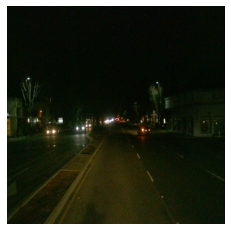

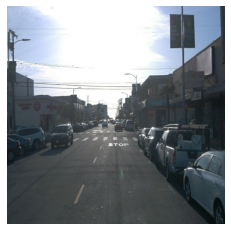

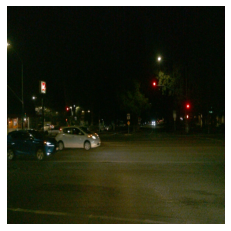

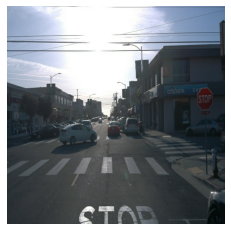

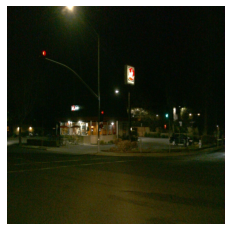

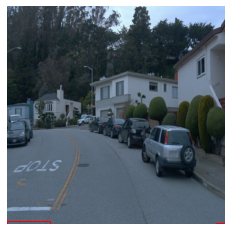

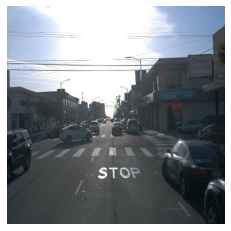

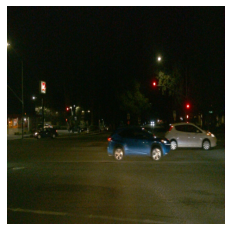

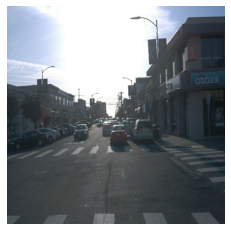

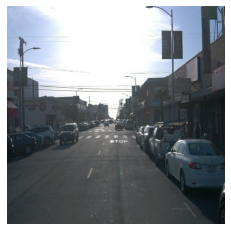

In [8]:
test_data.shuffle(50)
for image_num, batch in enumerate(test_data.take(10)):
    display_images(batch)
    try:
        os.makedirs(f"{current_dir}/examples/testing")
    except OSError as error:
        pass 
    plt.savefig(f"examples/testing/random_train_{image_num}.png")

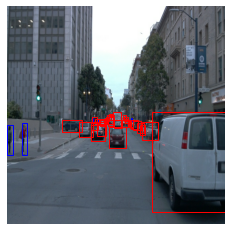

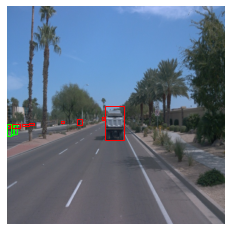

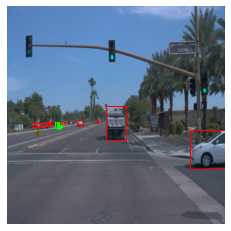

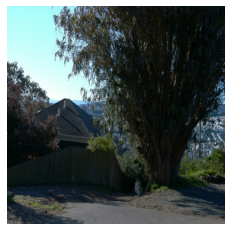

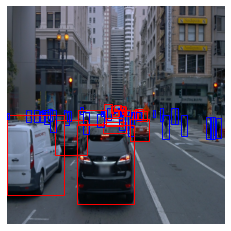

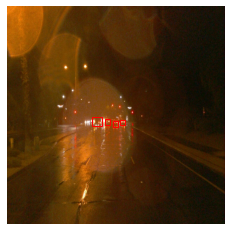

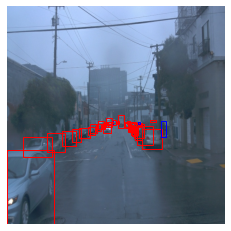

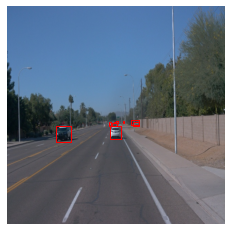

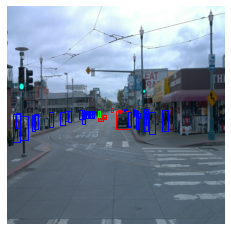

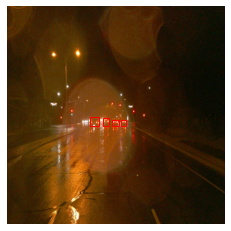

In [9]:
val_data.shuffle(50)
for image_num, batch in enumerate(train_data.take(10)):
    display_images(batch)
    try:
        os.makedirs(f"{current_dir}/examples/validating")
    except OSError as error:
        pass 
    plt.savefig(f"examples/validating/random_val_{image_num}.png")

## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

In [18]:
class_numbers = {1: 0, 2: 0, 4: 0}
for batch in train_data.take(100000): 
    # Class distributions among each batch
    for image_class in batch["groundtruth_classes"].numpy():
        class_numbers[image_class] += 1

print(class_numbers)

{1: 1728477, 2: 486237, 4: 12432}


<BarContainer object of 3 artists>

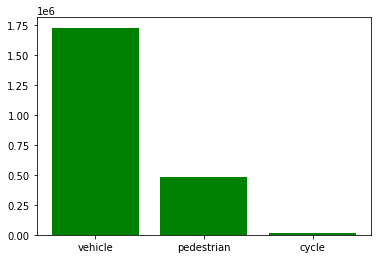

In [19]:
plt.bar(["vehicle", "pedestrian", "cycle"], list(class_numbers.values()), color = "green")

In [12]:
# the majority dataset contains of vehicles and the minority has cyclist content. 
# this dataset can be good when training a model to find the vehicles. 
# in order the model to be able to learn pedestrians and cyclist classes, it might be necessary to add some data augmentations for these two classes.